In [18]:
# i) Importing libraries and Images
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.filters import threshold_otsu

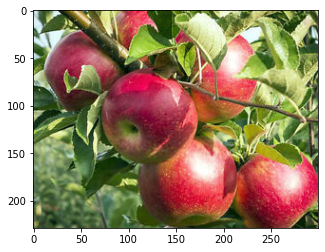

In [19]:
sample_image = cv2.imread('./apple_77.jpg')
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [20]:
# ii) Preprocessing the Image

twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

In [21]:
# iii) Defining Parameters

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
attempts=10

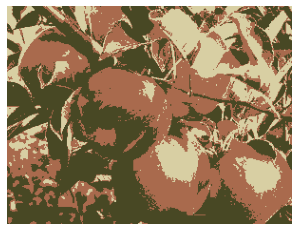

In [22]:
# iv) Applying K-Means for Image Segmentation 

ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.axis('off')
plt.imshow(result_image)

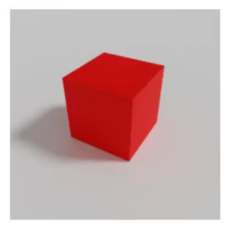

In [30]:
sample_image = cv2.imread('./Shapes.png')
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

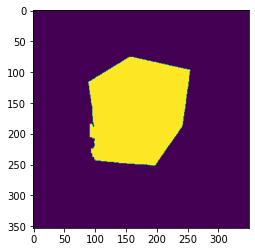

In [31]:
# Apply Otsu Thresholding on Image

img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

plt.imshow(img_otsu)

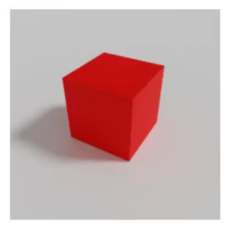

In [32]:
sample_image = cv2.imread('Shapes.png')
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

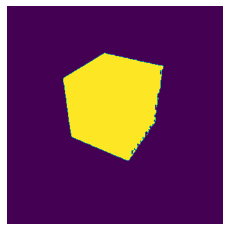

In [33]:
# iii) Create Mask by Detecting Color

low = np.array([0, 0, 0])
high = np.array([215, 51, 51])

mask = cv2.inRange(img, low, high)

plt.axis('off')
plt.imshow(mask)

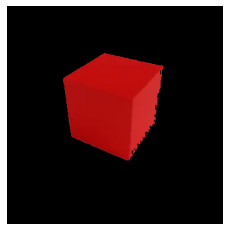

In [34]:
# iv) Apply the Mask

result = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(result)